In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset = pd.read_csv('drive/My Drive/06_Colab/230128/openwork_gtc1.csv')
dataset.head()

,Unnamed: 0,ave_wage,5y_CAGR,5y_sp,ROE,総合評価,待遇面の満足度,社員の士気,風通しの良さ,社員の相互尊重,20代成長環境,人材の長期育成,法令遵守意識,人事評価の適正感
0,伊藤忠商事,1627,22.2,90.75%,16.90%,4.33,4.7,4.1,4.0,3.9,4.0,3.6,4.7,3.6
1,三井物産,1482,24.5,100.51%,15.10%,4.32,4.7,3.9,4.0,4.0,3.9,3.9,4.8,3.4
2,三菱商事,1678,22.9,41.82%,11.90%,4.24,4.8,3.8,3.3,4.4,3.8,3.9,5.0,3.4
3,双日,1038,-15.9,42.35%,9.50%,4.16,4.2,3.7,4.0,3.8,4.3,3.7,4.6,3.1
4,丸紅,1192,3.1,89.39%,14.80%,4.02,4.7,3.4,3.7,3.8,3.8,3.2,4.6,3.3


In [ ]:
X = dataset[['ave_wage', '総合評価']].values.reshape(-1,2)
Y = dataset['5y_CAGR']

In [ ]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(1000, 2000, 1000)   # range of porosity values
y_pred = np.linspace(4, 5, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [ ]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [ ]:
r2 = model.score(X, Y)

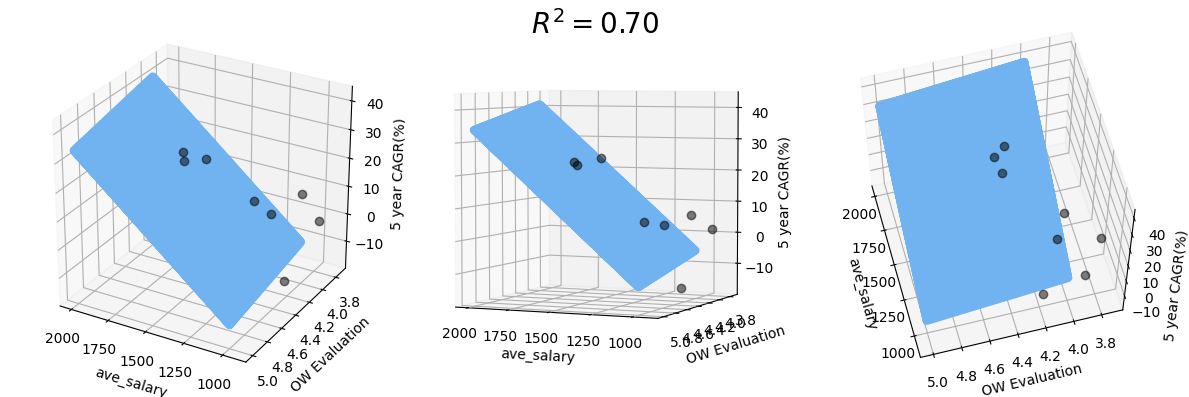

In [ ]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('ave_salary', fontsize=10)
    ax.set_ylabel('OW Evaluation', fontsize=10)
    ax.set_zlabel('5 year CAGR(%)', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()